In [ ]:
pip install --upgrade transformers sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 17.8 MB/s eta 0:00:00


# ***PEGASUS KÜTÜPHANE***

In [ ]:
import torch
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
modelPeg_name = 'tuner007/pegasus_paraphrase'
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizerPeg = PegasusTokenizer.from_pretrained(modelPeg_name)
modelPeg = PegasusForConditionalGeneration.from_pretrained(modelPeg_name).to(torch_device)

Downloading:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

In [ ]:
def get_response(input_text, num_return_sequences):
    batch = tokenizerPeg.prepare_seq2seq_batch([input_text],
                                            truncation=True,
                                            padding='longest',
                                            return_tensors="pt").to(torch_device)
    translated = modelPeg.generate(**batch,
                                num_beams=num_return_sequences,
                                num_return_sequences=num_return_sequences,
                                temperature=1.5).to(torch_device)
    tgt_text = tokenizerPeg.batch_decode(translated, skip_special_tokens=True)
    return tgt_text

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
import pickle


In [ ]:
#df=pd.read_csv('/content/yelp_labelled.txt',names=['sentence', 'label'], sep='\t')
df=pd.read_csv('/content/Imdb.txt',names=['sentence', 'label'], sep=',')
#df=pd.read_csv('/content/Finance.txt',names=['label', 'sentence'],encoding='latin-1')



In [ ]:
from bs4 import BeautifulSoup#2.Data set için
import re
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['sentence'] = df['sentence'].apply(cleanText)

In [ ]:
import re #1.Data Set için
def sentence_rge(data):
    data=re.sub('<[^>]*>','',data) # Html taglerini kaldırma
    emoji=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',data) #Emojileri bulma
    data=re.sub('[\W]+',' ',data.lower()) +\
                ' '.join(emoji).replace('-','')
    return data

df['sentence']=df['sentence'].apply(sentence_rge)

In [ ]:
from nltk.stem.porter import PorterStemmer

porter=PorterStemmer()

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop=stopwords.words('english')

df['sentence'] = df['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
sentiment  = {'positive': 0,'neutral': 1,'negative':2}#2.Dataset

df.label = [sentiment[item] for item in df.label] 
print(df)

      label                                           sentence
0         1  according gran , company plans move production...
1         1  technopolis plans develop stages area less 100...
2         2  international electronic industry company elco...
3         0  new production plant company would increase ca...
4         0  according company 's updated strategy years 20...
...     ...                                                ...
4841      2  london marketwatch -- share prices ended lower...
4842      1  rinkuskiai 's beer sales fell 6.5 per cent 4.1...
4843      2  operating profit fell eur 35.4 mn eur 68.8 mn ...
4844      2  net sales paper segment decreased eur 221.6 mn...
4845      2  sales finland decreased 10.5 % january , sales...

[4846 rows x 2 columns]


In [ ]:
origdata = df.to_numpy()

In [ ]:
origdataX=[]
origdataY=[]

for i in range(len(origdata)):
  origdataX.append(origdata[i][0])
  origdataY.append(origdata[i][1])


In [ ]:
origdataX = np.array(origdataX)
origdataY = np.array(origdataY)

In [ ]:
from collections import Counter

def counter_word(text_col):
    count = Counter()
    for text in text_col:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(origdataX[:3000])

MAX_NB_WORDS = len(counter)
MAX_SEQUENCE_LENGTH = 1000

In [ ]:
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(origdataX[:3000])
with open("tokenizer.pickle", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
X = tokenizer.texts_to_sequences(origdataX[:3000])
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (3000, 1000)


In [ ]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
Y = labelencoder.fit_transform(origdataY[:3000])
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (3000,)


In [ ]:
Y = to_categorical(origdataY[:3000])#2.Data set için


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2250, 1000) (2250,)
(750, 1000) (750,)


In [ ]:
X_train.shape[0]

750

In [ ]:
import tensorflow
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

In [ ]:

model = tensorflow.keras.models.Sequential()
model.add(layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

epochs = 10
batch_size = 64

In [ ]:
#history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_test, y_test))#Önce ve sonra için

history111 = model.fit(X_train[:1125], y_train[:1125], epochs=epochs, batch_size=batch_size,validation_data=(X_test, y_test))#Önce ve sonra için

Epoch 1/10
18/18 [==============================] - 17s 811ms/step - loss: 0.6898 - accuracy: 0.5342 - val_loss: 0.6832 - val_accuracy: 0.5440
Epoch 2/10
18/18 [==============================] - 14s 804ms/step - loss: 0.6203 - accuracy: 0.6987 - val_loss: 0.5905 - val_accuracy: 0.7427
Epoch 3/10
18/18 [==============================] - 17s 986ms/step - loss: 0.3464 - accuracy: 0.9591 - val_loss: 0.4509 - val_accuracy: 0.8160
Epoch 4/10
18/18 [==============================] - 13s 742ms/step - loss: 0.1429 - accuracy: 0.9947 - val_loss: 0.4343 - val_accuracy: 0.8107
Epoch 5/10
18/18 [==============================] - 15s 817ms/step - loss: 0.0698 - accuracy: 0.9982 - val_loss: 0.5775 - val_accuracy: 0.7627
Epoch 6/10
18/18 [==============================] - 14s 753ms/step - loss: 0.0339 - accuracy: 0.9991 - val_loss: 0.6225 - val_accuracy: 0.7427
Epoch 7/10
18/18 [==============================] - 14s 783ms/step - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.6204 - val_accuracy: 0.7867

# ***PEGASUS YAPAY VERİ ÜRETME***

In [ ]:
PegartfdataX=[]

In [ ]:
PegartfdataY=[]

In [ ]:
for j in range(X_train.shape[0]):
  PegartfdataX.append(get_response(origdataX[j],1))
  PegartfdataY.append(origdataY[j])#1 cümle için
  PegartfdataY.append(origdataY[j])#2 cümle için
  
  print(j)




In [ ]:
with open ('/content/PegartfdataX32.txt','r') as dosya:
   for line in dosya.read().splitlines():
     PegartfdataX.append(line)

In [ ]:
with open('Pegartfdata32.txt', 'w') as f:
    for item in PegartfdataX:
        f.write("%s\n" % item)


In [ ]:
PegartfdataXtempp=PegartfdataX

In [ ]:
PegartfdataX = np.array(PegartfdataX)
PegartfdataY = np.array(PegartfdataY)

In [ ]:
PegartfdataY.shape

(4500,)

In [ ]:
PegartfdataX=PegartfdataX.flatten()
PegartfdataY=PegartfdataY.flatten()

In [ ]:
X_train2 = tokenizer.texts_to_sequences(PegartfdataX)
X_train2 = pad_sequences(X_train2, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', PegartfdataX.shape)

Shape of data tensor: (1500,)


In [ ]:
labelencoder = preprocessing.LabelEncoder()
PegartfdataYtemp = labelencoder.fit_transform(PegartfdataY)
print('Shape of label tensor:', PegartfdataYtemp.shape)

Shape of label tensor: (1500,)


In [ ]:
PegartfdataYtemp = to_categorical(PegartfdataY)

In [ ]:
dforgx = pd.DataFrame(origdataX[:750], columns = ['sentiment'])#
dfartx = pd.DataFrame(PegartfdataX[:750], columns = ['sentiment'])

In [ ]:
dfx=pd.concat([dforgx, dfartx], axis = 0)#

In [ ]:
dforgy = pd.DataFrame(origdataY[:750], columns = ['label'])#
dfarty = pd.DataFrame(PegartfdataY[:750], columns = ['label'])

In [ ]:
dfy=pd.concat([dforgy, dforgy], axis = 0)#

In [ ]:
len(origdataY)

1000

In [ ]:
dfall=pd.concat([dfx, dfy], axis = 1)#

In [ ]:
dfall = shuffle(dfall)#

In [ ]:
dfall = dfall.to_numpy()#

In [ ]:
shuffleX=[]#
shuffleY=[]
for i in range(len(dfall)):
  shuffleX.append(dfall[i][0])
  shuffleY.append(dfall[i][1])

In [ ]:
len(dfall)

1500

In [ ]:
shuffleX = np.array(shuffleX)#
shuffleY = np.array(shuffleY)

In [ ]:
X_train2 = tokenizer.texts_to_sequences(shuffleX)
X_train2 = pad_sequences(X_train2, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_train2.shape)

Shape of data tensor: (1500, 1000)


In [ ]:
PegartfdataYtemp = to_categorical(shuffleY)#2.Data set için

In [ ]:
labelencoder = preprocessing.LabelEncoder()
PegartfdataYtemp = labelencoder.fit_transform(shuffleY)
print('Shape of label tensor:', PegartfdataYtemp.shape)

Shape of label tensor: (1500,)


In [ ]:
history12=model.fit(X_train2, PegartfdataYtemp, epochs=epochs, batch_size=batch_size,validation_data=(X_test, y_test))

Epoch 1/10
71/71 [==============================] - 53s 713ms/step - loss: 0.6870 - accuracy: 0.5373 - val_loss: 0.5848 - val_accuracy: 0.8120
Epoch 2/10
71/71 [==============================] - 51s 714ms/step - loss: 0.5482 - accuracy: 0.7553 - val_loss: 0.3614 - val_accuracy: 0.9053
Epoch 3/10
71/71 [==============================] - 49s 687ms/step - loss: 0.3813 - accuracy: 0.8407 - val_loss: 0.2816 - val_accuracy: 0.9027
Epoch 4/10
71/71 [==============================] - 49s 692ms/step - loss: 0.2870 - accuracy: 0.8811 - val_loss: 0.2715 - val_accuracy: 0.8933
Epoch 5/10
71/71 [==============================] - 53s 744ms/step - loss: 0.2195 - accuracy: 0.9138 - val_loss: 0.2365 - val_accuracy: 0.9040
Epoch 6/10
71/71 [==============================] - 49s 696ms/step - loss: 0.1759 - accuracy: 0.9271 - val_loss: 0.2342 - val_accuracy: 0.9080
Epoch 7/10
71/71 [==============================] - 51s 723ms/step - loss: 0.1374 - accuracy: 0.9440 - val_loss: 0.2345 - val_accuracy: 0.9147

In [ ]:
history11 = model.fit(X_train[1125:], y_train[1125:], epochs=epochs, batch_size=batch_size,validation_data=(X_test, y_test))

Epoch 1/10
18/18 [==============================] - 14s 795ms/step - loss: 0.3478 - accuracy: 0.9191 - val_loss: 0.2316 - val_accuracy: 0.9387
Epoch 2/10
18/18 [==============================] - 17s 952ms/step - loss: 0.0919 - accuracy: 0.9724 - val_loss: 0.3309 - val_accuracy: 0.9187
Epoch 3/10
18/18 [==============================] - 15s 812ms/step - loss: 0.2617 - accuracy: 0.9493 - val_loss: 0.4995 - val_accuracy: 0.8947
Epoch 4/10
18/18 [==============================] - 14s 812ms/step - loss: 0.2851 - accuracy: 0.9360 - val_loss: 0.2971 - val_accuracy: 0.9147
Epoch 5/10
18/18 [==============================] - 14s 787ms/step - loss: 0.0848 - accuracy: 0.9742 - val_loss: 0.2800 - val_accuracy: 0.9040
Epoch 6/10
18/18 [==============================] - 14s 758ms/step - loss: 0.0561 - accuracy: 0.9867 - val_loss: 0.2789 - val_accuracy: 0.9093
Epoch 7/10
18/18 [==============================] - 14s 766ms/step - loss: 0.0272 - accuracy: 0.9964 - val_loss: 0.2729 - val_accuracy: 0.9080

In [ ]:
history_dictorg = history.history # orjinal veri
loss_values = history_dictorg['loss'] 
val_loss_values = history_dictorg['val_loss']
accuracy = history_dictorg['accuracy']
val_accuracy = history_dictorg['val_accuracy']



history_dictorgyap = history2.history #önce orjinal sonra yapay 
loss_values2 = history_dictorgyap['loss']
val_loss_values2 = history_dictorgyap['val_loss']
accuracy2 = history_dictorgyap['accuracy']
val_accuracy2 = history_dictorgyap['val_accuracy']

In [ ]:
history_dict6 = history6.history # Yapay veri
loss_values6 = history_dict6['loss']
val_loss_values6 = history_dict6['val_loss']
accuracy6 = history_dict6['accuracy']
val_accuracy6 = history_dict6['val_accuracy']

history_dict7 = history7.history #Sonra Orjinal
loss_values7 = history_dict7['loss']
val_loss_values7 = history_dict7['val_loss']
accuracy7 = history_dict7['accuracy']
val_accuracy7 = history_dict7['val_accuracy']

In [ ]:
history_dict4 = history4.history #Orta
loss_values4 = history_dict4['loss']
val_loss_values4 = history_dict4['val_loss']
accuracy4 = history_dict4['accuracy']
val_accuracy4 = history_dict4['val_accuracy']

In [ ]:
history_dict5 = history5.history #Karışık
loss_values5 = history_dict5['loss']
val_loss_values5 = history_dict5['val_loss']
accuracy5 = history_dict5['accuracy']
val_accuracy5 = history_dict5['val_accuracy']

In [ ]:

history_dict8 = history8.history #200  önce orjinal sonra yapay 
loss_values8 = history_dict8['loss']
val_loss_values8 = history_dict8['val_loss']
accuracy8 = history_dict8['accuracy']
val_accuracy8 = history_dict8['val_accuracy']

In [ ]:
history_dict9 = history9.history # 200 Yapay veri
loss_values9 = history_dict9['loss']
val_loss_values9 = history_dict9['val_loss']
accuracy9 = history_dict9['accuracy']
val_accuracy9 = history_dict9['val_accuracy']

history_dict10 = history10.history #Sonra Orjinal
loss_values10 = history_dict10['loss']
val_loss_values10 = history_dict10['val_loss']
accuracy10 = history_dict10['accuracy']
val_accuracy10 = history_dict10['val_accuracy']

In [ ]:
history_dict11 = history11.history #200Orta
loss_values11 = history_dict11['loss']
val_loss_values11 = history_dict11['val_loss']
accuracy11 = history_dict11['accuracy']
val_accuracy11 = history_dict11['val_accuracy']

In [ ]:
history_dict12 = history12.history #200Karışık
loss_values12 = history_dict12['loss']
val_loss_values12 = history_dict12['val_loss']
accuracy12 = history_dict12['accuracy']
val_accuracy12 = history_dict12['val_accuracy']

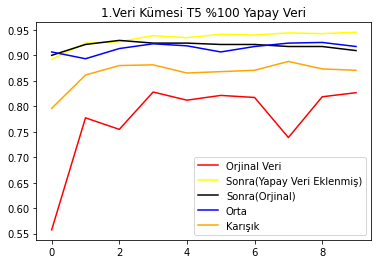

In [ ]:
plt.plot(val_accuracy, label='Orjinal Veri',color="red")
plt.plot(val_accuracy2, label='Sonra(Yapay Veri Eklenmiş)',color="yellow")

#plt.plot(val_accuracy6, label='Yapay Veri',color="green")
plt.plot(val_accuracy7, label='Sonra(Orjinal)',color="black")

plt.plot(val_accuracy4, label='Orta',color="blue")
plt.plot(val_accuracy5, label='Karışık',color="orange")

plt.title('1.Veri Kümesi T5 %100 Yapay Veri')
plt.legend(loc = 'best')
plt.show()

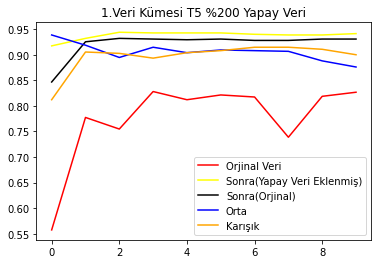

In [ ]:
plt.plot(val_accuracy, label='Orjinal Veri',color="red")
plt.plot(val_accuracy8, label='Sonra(Yapay Veri Eklenmiş)',color="yellow")

#plt.plot(val_accuracy9, label=' Yapay Veri',color="green")
plt.plot(val_accuracy10, label='Sonra(Orjinal)',color="black")

plt.plot(val_accuracy11, label='Orta',color="blue")
plt.plot(val_accuracy12, label='Karışık',color="orange")

plt.title('1.Veri Kümesi T5 %200 Yapay Veri')
plt.legend(loc = 'best')
plt.show()

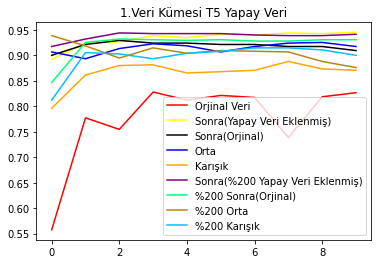

In [ ]:
plt.plot(val_accuracy, label='Orjinal Veri',color="red")
plt.plot(val_accuracy2, label='Sonra(Yapay Veri Eklenmiş)',color="yellow")

#plt.plot(val_accuracy6, label='Yapay Veri',color="green")
plt.plot(val_accuracy7, label='Sonra(Orjinal)',color="black")

plt.plot(val_accuracy4, label='Orta',color="blue")
plt.plot(val_accuracy5, label='Karışık',color="orange")


plt.plot(val_accuracy8, label='Sonra(%200 Yapay Veri Eklenmiş)',color="purple")

#plt.plot(val_accuracy9, label='%200 Yapay Veri',color="indigo")
plt.plot(val_accuracy10, label='%200 Sonra(Orjinal)',color="springgreen")

plt.plot(val_accuracy11, label='%200 Orta',color="darkgoldenrod")
plt.plot(val_accuracy12, label='%200 Karışık',color="deepskyblue")


plt.title('1.Veri Kümesi T5 Yapay Veri')
plt.legend(loc = 'best')
plt.show()


# ***T5 KÜTÜPHANE***

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizerTf = AutoTokenizer.from_pretrained("Vamsi/T5_Paraphrase_Paws")  
modelTf = AutoModelForSeq2SeqLM.from_pretrained("Vamsi/T5_Paraphrase_Paws")

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/892M [00:00<?, ?B/s]

In [ ]:
import torch

In [ ]:
TfartfdataX=[]
TfartfdataY=[]

In [ ]:
with open ('/content/TfartfdataX12.txt','r') as dosya:
   for line in dosya.read().splitlines():
     TfartfdataX.append(line)

# ***T5 YAPAY VERİ ÜRETME***

In [ ]:
for k in range(X_train.shape[0]):  
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  text ="paraphrase: " + origdataX[k] + " </s>" 

  encoding = tokenizerTf.encode_plus(text,pad_to_max_length=True, return_tensors="pt",truncation = True)

  input_ids, attention_masks = encoding["input_ids"].to(device), encoding["attention_mask"].to(device)

  outputs = modelTf.generate(
      input_ids=input_ids, attention_mask=attention_masks,
      max_length=10000,
      do_sample=True,
      top_k=220,
      top_p=1,
      early_stopping=True,
      num_return_sequences=1
  )

  for output in outputs:
      line = tokenizerTf.decode(output, skip_special_tokens=True,clean_up_tokenization_spaces=True)
      TfartfdataX.append(line)
  TfartfdataY.append(origdataY[k])
  TfartfdataY.append(origdataY[k])#2 cümle için
  print(k)   


In [ ]:
with open('TfartfdataX31.txt', 'w') as f:
    for item in TfartfdataX:
        f.write("%s\n" % item)

In [ ]:
TfartfdataXtemp=TfartfdataX

In [ ]:
TfartfdataX = np.array(TfartfdataX)
TfartfdataY = np.array(TfartfdataY)

In [ ]:
TfartfdataX=TfartfdataX.flatten()
TfartfdataY=TfartfdataY.flatten()

In [ ]:
X_train2 = tokenizer.texts_to_sequences(TfartfdataX)
X_train2 = pad_sequences(X_train2, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_train2.shape)

Shape of data tensor: (4500, 1000)


In [ ]:
labelencoder = preprocessing.LabelEncoder()
PegartfdataYtemp = labelencoder.fit_transform(TfartfdataY)
print('Shape of label tensor:', PegartfdataYtemp.shape)

Shape of label tensor: (4500,)


In [ ]:
PegartfdataYtemp = to_categorical(TfartfdataY)#2.Data set için

In [ ]:
dforgx = pd.DataFrame(origdataX[:2250], columns = ['sentiment'])
dfartx = pd.DataFrame(TfartfdataX[:2250], columns = ['sentiment'])

In [ ]:
len(dfy)

4500

In [ ]:
dfx=pd.concat([dforgx, dfartx], axis = 0)

In [ ]:
dforgy = pd.DataFrame(origdataY[:2250], columns = ['label'])
dfarty = pd.DataFrame(TfartfdataY[:2250], columns = ['label'])

In [ ]:
dfy=pd.concat([dforgy, dforgy], axis = 0)

In [ ]:
dfall=pd.concat([dfx, dfy], axis = 1)

In [ ]:
dfall = shuffle(dfall)

In [ ]:
dfall = dfall.to_numpy()

In [ ]:
shuffleX=[]
shuffleY=[]
for i in range(len(dfall)):
  shuffleX.append(dfall[i][0])
  shuffleY.append(dfall[i][1])

In [ ]:
shuffleX = np.array(shuffleX)
shuffleY = np.array(shuffleY)

In [ ]:
X_train2 = tokenizer.texts_to_sequences(shuffleX)
X_train2 = pad_sequences(X_train2, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_train2.shape)

Shape of data tensor: (4500, 1000)


In [ ]:
labelencoder = preprocessing.LabelEncoder()
PegartfdataYtemp = labelencoder.fit_transform(shuffleY)
print('Shape of label tensor:', PegartfdataYtemp.shape)

Shape of label tensor: (4500,)


In [ ]:
PegartfdataYtemp = to_categorical(shuffleY)#2.Data set için

In [ ]:
X_train2 = vectorizer.transform(shuffleX)

In [ ]:
history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']
accuracy2 = history_dict2['accuracy']
val_accuracy2 = history_dict2['val_accuracy']

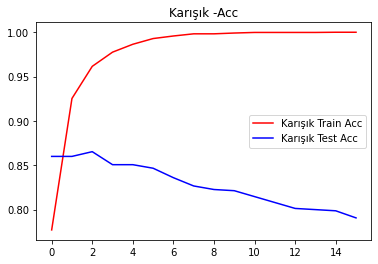

In [ ]:
plt.plot(accuracy2, label='Karışık Train Acc',color="red")
plt.plot(val_accuracy2, label='Karışık Test Acc',color="blue")

plt.title('Karışık -Acc')
plt.legend(loc = 'best')
plt.show()


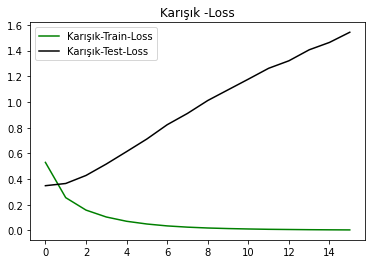

In [ ]:
plt.plot(loss_values2, label='Karışık-Train-Loss',color="green")
plt.plot(val_loss_values2, label='Karışık-Test-Loss',color="black")
plt.title('Karışık -Loss')
plt.legend(loc = 'best')
plt.show()